# Sentiment Analysis

## Introduction

So far, all of the analysis we've done has been pretty generic - looking at counts, creating scatter plots, etc. These techniques could be applied to numeric data as well.

When it comes to text data, there are a few popular techniques that we'll be going through, starting with sentiment analysis. A few key points to remember with sentiment analysis.

**Sentiment Labels:** Each word in a corpus is labeled in terms of polarity and subjectivity.
   * **Polarity**: How positive or negative a word is. -1 is very negative. +1 is very positive.
   * **Subjectivity**: How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.

Let's take a look at the sentiment of the various transcripts, both overall and throughout the comedy routine.

## Sentiment of Routine

In [30]:
# We'll start by reading in the corpus, which preserves word order
import pandas as pd

data = pd.read_pickle('corpus.pkl')
data

,transcript
ali,ladies and gentlemen please welcome to the sta...
anthony,thank you thank you thank you san francisco th...
joe,ladies and gentlemen welcome joe rogan wha...
john,armed with boyish charm and a sharp wit the fo...
mike,wow hey thank you thanks thank you guys hey se...
ronny,ladies and gentlemen make some noise for r...


In [ ]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# TextBlob for sentiment analysis 

from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data

,transcript,polarity,subjectivity
ali,ladies and gentlemen please welcome to the sta...,0.069636,0.481025
anthony,thank you thank you thank you san francisco th...,0.041705,0.563984
joe,ladies and gentlemen welcome joe rogan wha...,0.068466,0.536950
john,armed with boyish charm and a sharp wit the fo...,0.068988,0.486992
mike,wow hey thank you thanks thank you guys hey se...,0.080510,0.526178
ronny,ladies and gentlemen make some noise for r...,0.093029,0.460508


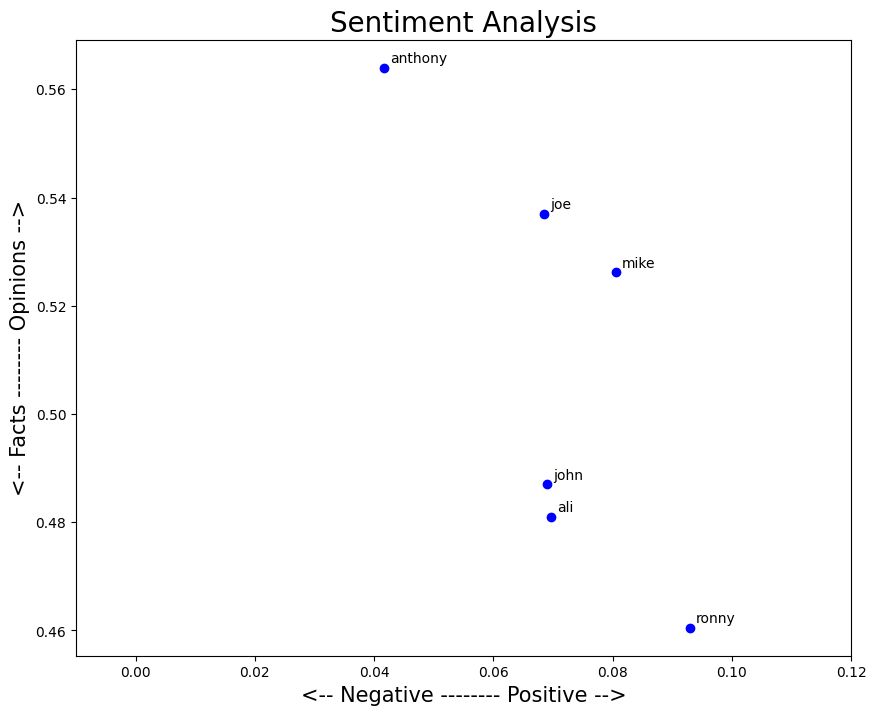

In [32]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, comedian in enumerate(data.index):
    x = data.polarity.loc[comedian]
    y = data.subjectivity.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data.index[index], fontsize=10)
    plt.xlim(-.01, .12)

plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

## Sentiment of Routine Over Time

Instead of looking at the overall sentiment, let's see if there's anything interesting about the sentiment over time throughout each routine.




In [33]:
# Split each routine into 10 parts
import numpy as np
import math

def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)

    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [34]:
# Let's take a look at our data again
data

,transcript,polarity,subjectivity
ali,ladies and gentlemen please welcome to the sta...,0.069636,0.481025
anthony,thank you thank you thank you san francisco th...,0.041705,0.563984
joe,ladies and gentlemen welcome joe rogan wha...,0.068466,0.536950
john,armed with boyish charm and a sharp wit the fo...,0.068988,0.486992
mike,wow hey thank you thanks thank you guys hey se...,0.080510,0.526178
ronny,ladies and gentlemen make some noise for r...,0.093029,0.460508


In [ ]:
list_pieces = []
for t in data.transcript:
    # Instead of skipping let's add an empty list for empty transcripts
    if len(t) == 0:
        list_pieces.append([])
    else:
        split = split_text(t)
        list_pieces.append(split)
list_pieces

[['ladies and gentlemen please welcome to the stage ali wong hi hello welcome thank you thank you for coming hello hello we are gonna have to get this shit over with cause i have to pee in  ten minutes but thank you everybody so much for coming  its a very exciting day for me its been a very exciting year for me i turned  this year yes thank you five people i appreciate that  i can tell that im getting older because now when i see an  girl my automatic thought is fuck you fuck you i dont even know you but fuck you cause im straight up jealous im jealous first and foremost of their metabolism because  girls they could just eat  shit and then they take a shit and have a sixpack right they got thatthat beautiful inner thigh clearance where they put their feet together and theres that huge gap here with the light of potential just radiating through and then when they go to sleep they just go to sleep right they dont have insomnia yet they dont know what its  to have to take a ambien or dow

In [36]:
# The list has 10 elements, one for each transcript
len(list_pieces)

6

In [37]:
# Each transcript has been split into 10 pieces of text
len(list_pieces[0])

10

In [38]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)

polarity_transcript

[[0.10653174603174606,
  0.0597686925647452,
  0.07376429930777757,
  0.0968764172335601,
  -0.044225181598062956,
  0.1446902783596332,
  0.03858786782837415,
  0.11271031746031744,
  0.0130562281409739,
  0.10076312576312572],
 [0.1258448859341717,
  -0.11503246753246757,
  -0.018856048166393004,
  0.03688446969696969,
  0.11571983571983571,
  0.060912058371735765,
  0.08417933130699089,
  -0.05635649497894396,
  0.03465530884885724,
  0.13301233231788784],
 [0.06925929313253257,
  0.022352132885840748,
  0.09011904761904763,
  0.07738060326770002,
  0.09232182249423629,
  0.08466967814793898,
  -0.01017831374974232,
  0.028752587991718388,
  0.05638961038961039,
  0.163552286715552],
 [0.15426729024943314,
  0.009567053861171512,
  0.07259509154040403,
  0.1280739271017049,
  0.1076248548199768,
  0.03346463585434175,
  0.0004070319923978598,
  0.02917065107363614,
  0.09483543417366946,
  0.08303081838796122],
 [0.1308386958386958,
  0.010383456412868182,
  0.15381504922644162,
  0

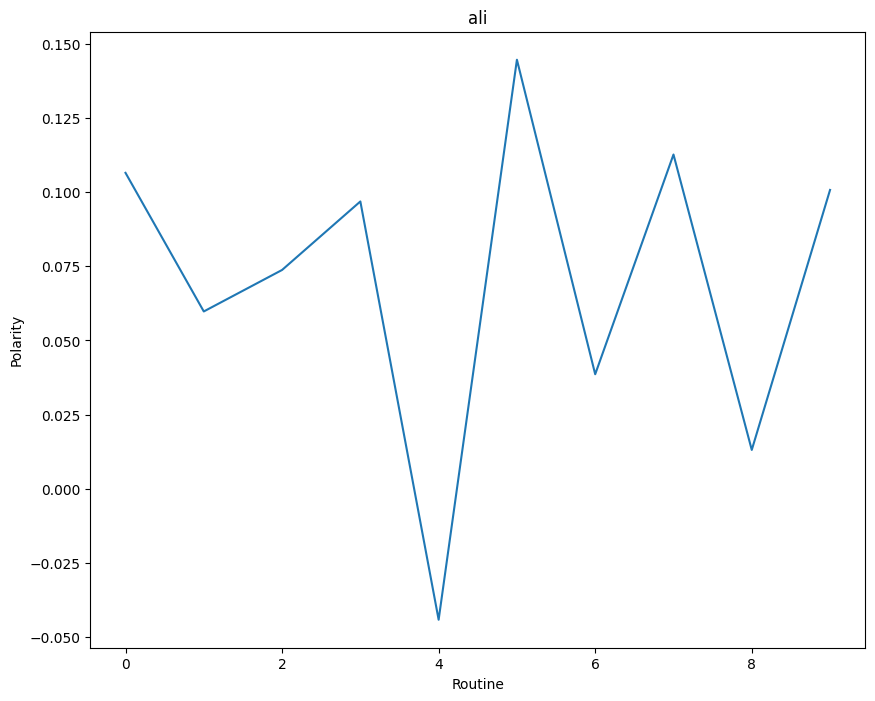

In [39]:
# Show the plot for one comedian
plt.plot(polarity_transcript[0])
plt.title(data.index[0])
plt.xlabel('Routine')
plt.ylabel('Polarity')
plt.show()

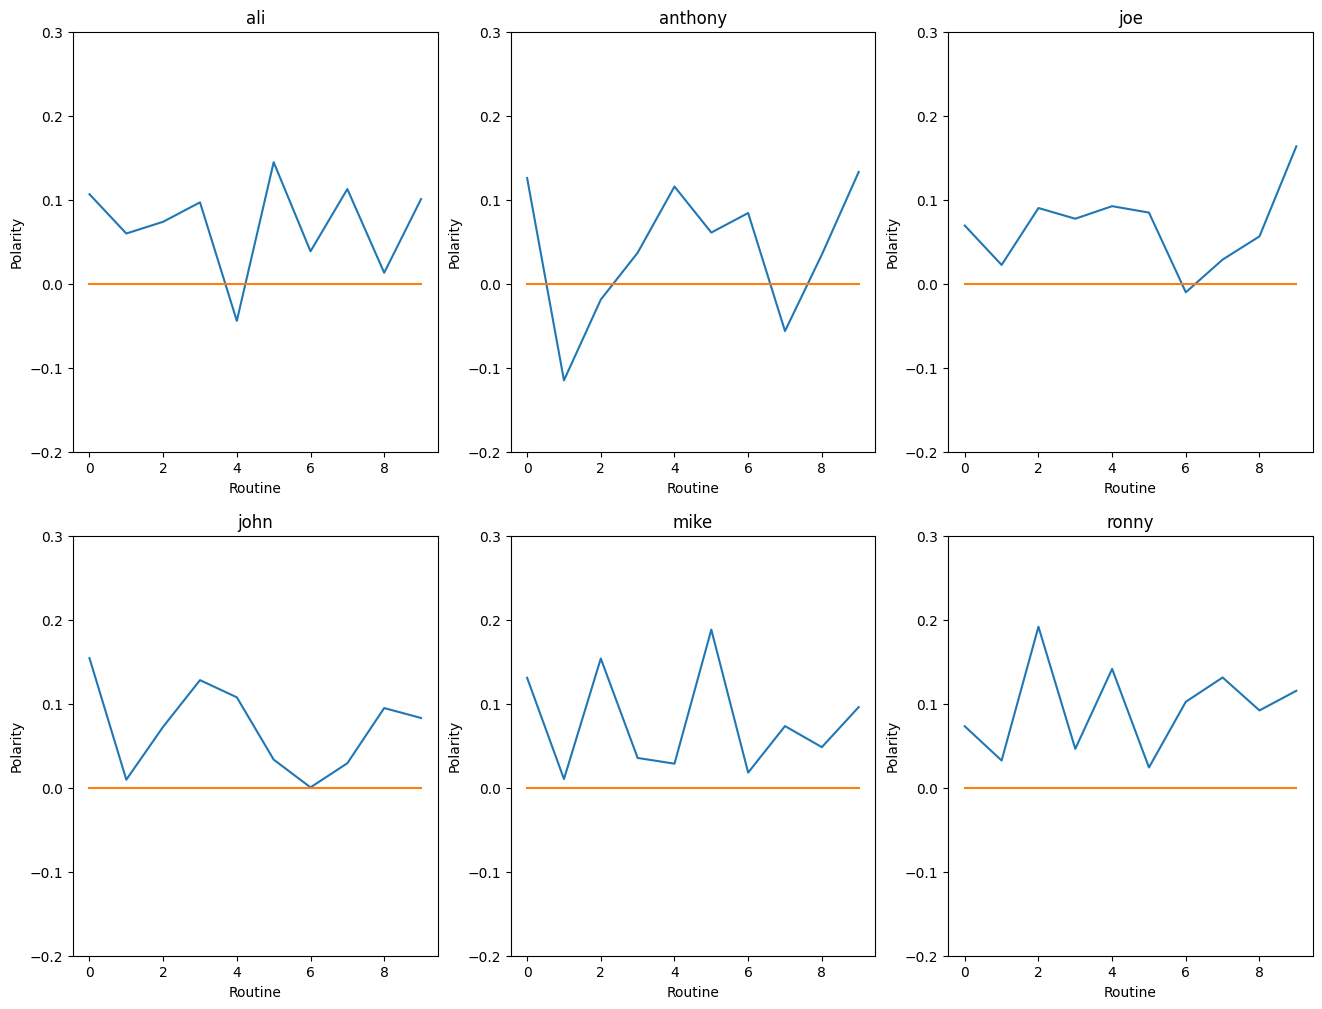

In [40]:
# Show the plot for all comedians
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):
    plt.subplot(2, 3, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data.index[index])
    plt.ylim(ymin=-.2, ymax=.3)
    plt.xlabel('Routine')
    plt.ylabel('Polarity')

plt.show()

All the comedians, except Anthony, remain generally positive throughout the routine.

On the other hand, we have some pretty different patterns here like Anthony sometimes speaks positively and sometimes negatively.

Let us modify the number of sections the comedy routine is split into and see how the charts over time change.

In [41]:
def split_text(text, n=20):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)

    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [42]:
# Let's take a look at our data again
data

,transcript,polarity,subjectivity
ali,ladies and gentlemen please welcome to the sta...,0.069636,0.481025
anthony,thank you thank you thank you san francisco th...,0.041705,0.563984
joe,ladies and gentlemen welcome joe rogan wha...,0.068466,0.536950
john,armed with boyish charm and a sharp wit the fo...,0.068988,0.486992
mike,wow hey thank you thanks thank you guys hey se...,0.080510,0.526178
ronny,ladies and gentlemen make some noise for r...,0.093029,0.460508


In [ ]:
list_pieces = []
for t in data.transcript:
    if len(t) == 0:
        list_pieces.append([])
    else:
        split = split_text(t)
        list_pieces.append(split)
list_pieces

[['ladies and gentlemen please welcome to the stage ali wong hi hello welcome thank you thank you for coming hello hello we are gonna have to get this shit over with cause i have to pee in  ten minutes but thank you everybody so much for coming  its a very exciting day for me its been a very exciting year for me i turned  this year yes thank you five people i appreciate that  i can tell that im getting older because now when i see an  girl my automatic thought is fuck you fuck you i dont even know you but fuck you cause im straight up jealous im jealous first and foremost of their metabolism because  girls they could just eat  shit and then they take a shit and have a sixpack right they got thatthat beautiful inner thigh clearance where they put their feet together and theres that huge gap here with the light of potential just radiating through and then when they go to sleep they just go to sleep right they dont have insomnia yet they dont know what its  to have to take a ambien or dow

In [44]:
# The list has 10 elements, one for each transcript
len(list_pieces)

6

In [45]:
# Each transcript has been split into 10 pieces of text
len(list_pieces[0])

20

In [46]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)

polarity_transcript

[[0.1784704184704185,
  0.018606701940035247,
  0.08186507936507938,
  0.042811000369139915,
  0.10084175084175084,
  0.048943302068302066,
  0.051546149323927135,
  0.13908045977011493,
  0.01442307692307692,
  -0.09043290043290045,
  0.10329550329550327,
  0.20595454545454547,
  0.046320638820638804,
  0.03255068102629079,
  0.11867368742368742,
  0.10625,
  0.012189381499726329,
  0.013894179894179896,
  0.026378446115288227,
  0.17142857142857135],
 [0.2536750783092247,
  -0.012612090290661711,
  0.008337198515769957,
  -0.20209059233449478,
  -0.13022108843537414,
  0.15061249137336094,
  0.062179487179487195,
  0.014962121212121201,
  0.13023819273819273,
  0.09653486394557821,
  -0.015507518796992508,
  0.18190972222222224,
  0.008174603174603171,
  0.18678571428571428,
  -0.05743894993894994,
  -0.0551328502415459,
  -0.027695675971538034,
  0.08944859853950761,
  0.015887132191480018,
  0.21991167434715814],
 [0.05339826839826838,
  0.08227346727346728,
  0.04145537002679862,


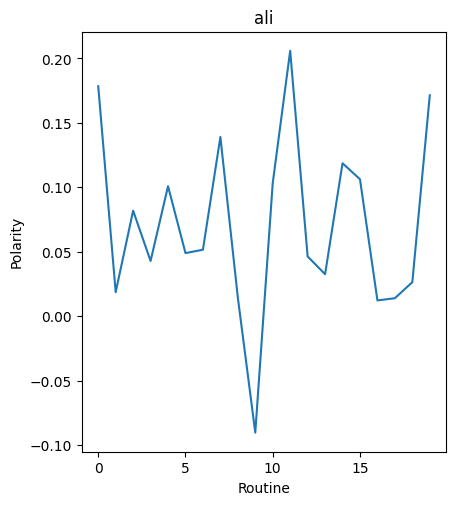

In [47]:
# Show the plot for one comedian
plt.subplot(2, 3, index+1)
plt.plot(polarity_transcript[0])
plt.title(data.index[0])
plt.xlabel('Routine')
plt.ylabel('Polarity')
plt.show()

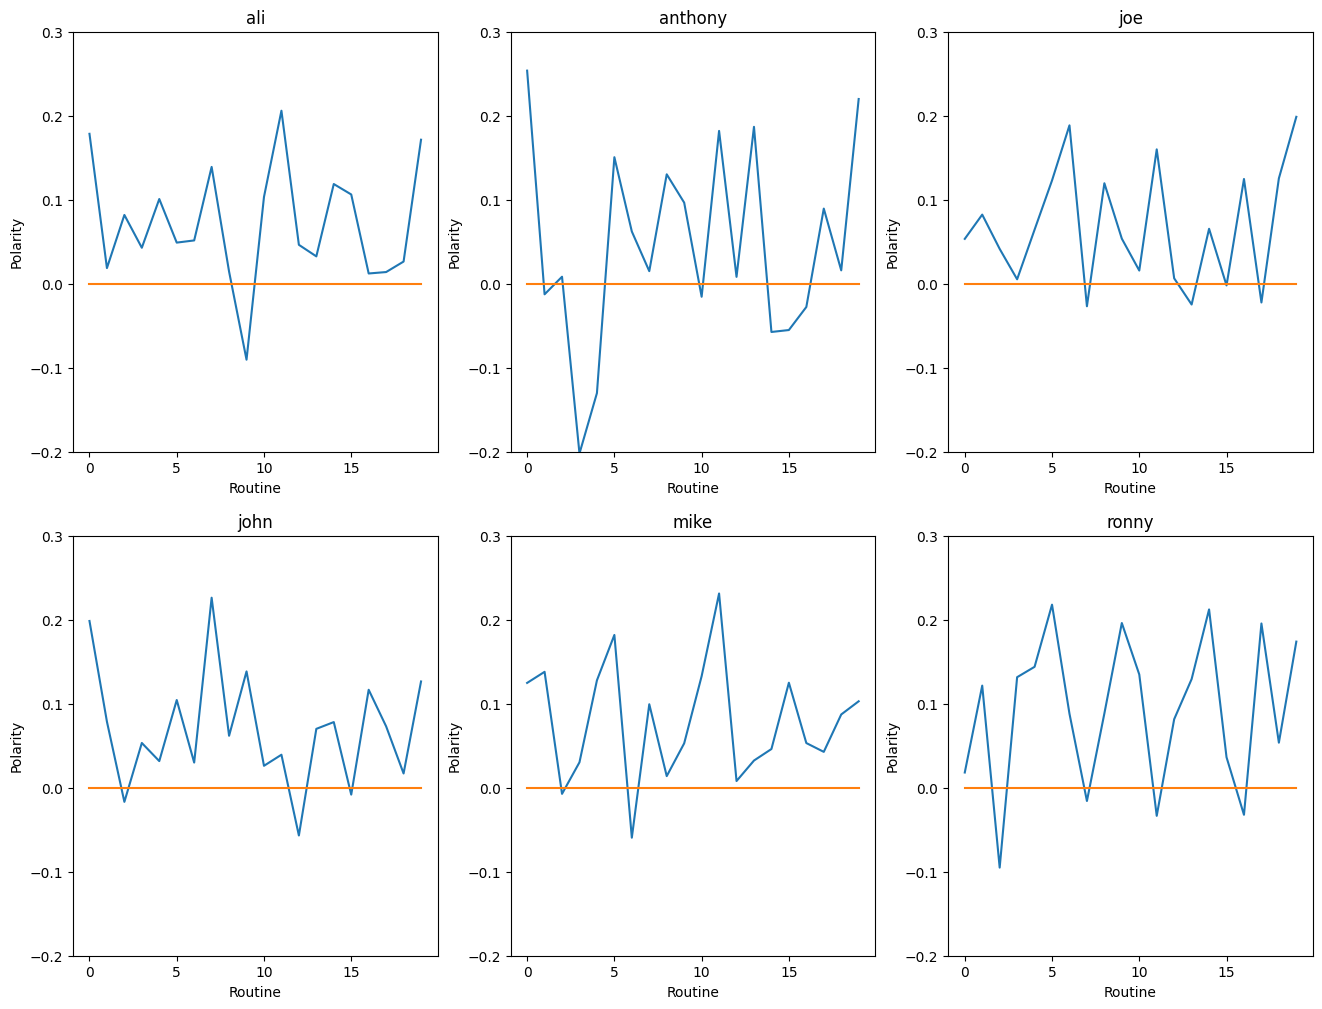

In [48]:
# Show the plot for all comedians
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):
    plt.subplot(2, 3, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,20), np.zeros(20))
    plt.xlabel('Routine')
    plt.ylabel('Polarity')
    plt.title(data.index[index])
    plt.ylim(ymin=-.2, ymax=.3)

plt.show()

In [49]:
def split_text(text, n=5):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)

    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [50]:
# Let's take a look at our data again
data

,transcript,polarity,subjectivity
ali,ladies and gentlemen please welcome to the sta...,0.069636,0.481025
anthony,thank you thank you thank you san francisco th...,0.041705,0.563984
joe,ladies and gentlemen welcome joe rogan wha...,0.068466,0.536950
john,armed with boyish charm and a sharp wit the fo...,0.068988,0.486992
mike,wow hey thank you thanks thank you guys hey se...,0.080510,0.526178
ronny,ladies and gentlemen make some noise for r...,0.093029,0.460508


In [ ]:
list_pieces = []
for t in data.transcript:
    if len(t) == 0:
        list_pieces.append([])
    else:
        split = split_text(t)
        list_pieces.append(split)
list_pieces

[['ladies and gentlemen please welcome to the stage ali wong hi hello welcome thank you thank you for coming hello hello we are gonna have to get this shit over with cause i have to pee in  ten minutes but thank you everybody so much for coming  its a very exciting day for me its been a very exciting year for me i turned  this year yes thank you five people i appreciate that  i can tell that im getting older because now when i see an  girl my automatic thought is fuck you fuck you i dont even know you but fuck you cause im straight up jealous im jealous first and foremost of their metabolism because  girls they could just eat  shit and then they take a shit and have a sixpack right they got thatthat beautiful inner thigh clearance where they put their feet together and theres that huge gap here with the light of potential just radiating through and then when they go to sleep they just go to sleep right they dont have insomnia yet they dont know what its  to have to take a ambien or dow

In [52]:
# The list has 10 elements, one for each transcript
len(list_pieces)

6

In [53]:
# Each transcript has been split into 10 pieces of text
len(list_pieces[0])

5

In [54]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)

polarity_transcript

[[0.08039945144724558,
  0.08411852813852817,
  0.052574475570343344,
  0.06731749946866224,
  0.0629915421156297],
 [0.01635517981297205,
  0.01302548238388946,
  0.08896328299871606,
  0.012447503306878304,
  0.08044219908444046],
 [0.043167185245310234,
  0.08306740878169447,
  0.08893722018722018,
  0.011014839860993695,
  0.10942972291457145],
 [0.0814890648470531,
  0.0979837112040502,
  0.07144591611479031,
  0.013341008357786885,
  0.08915840520802351],
 [0.07860045425096442,
  0.09353365061439586,
  0.10841303013716809,
  0.04103581529581529,
  0.07054866850321394],
 [0.04917716474701768,
  0.10887175324675324,
  0.0799526546250684,
  0.11370066318252847,
  0.10438087507730365]]

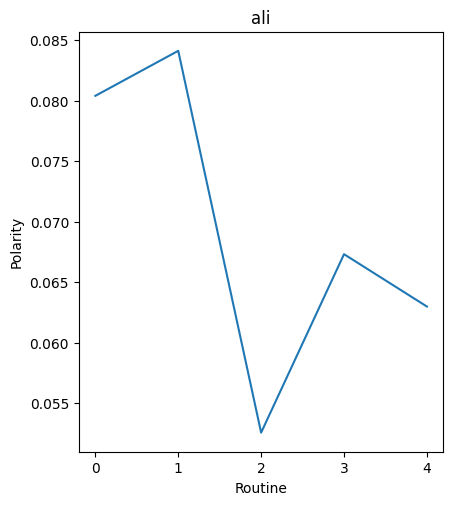

In [55]:
# Show the plot for one comedian
plt.subplot(2, 3, index+1)
plt.plot(polarity_transcript[0])
plt.xlabel('Routine')
plt.ylabel('Polarity')
plt.title(data.index[0])
plt.show()

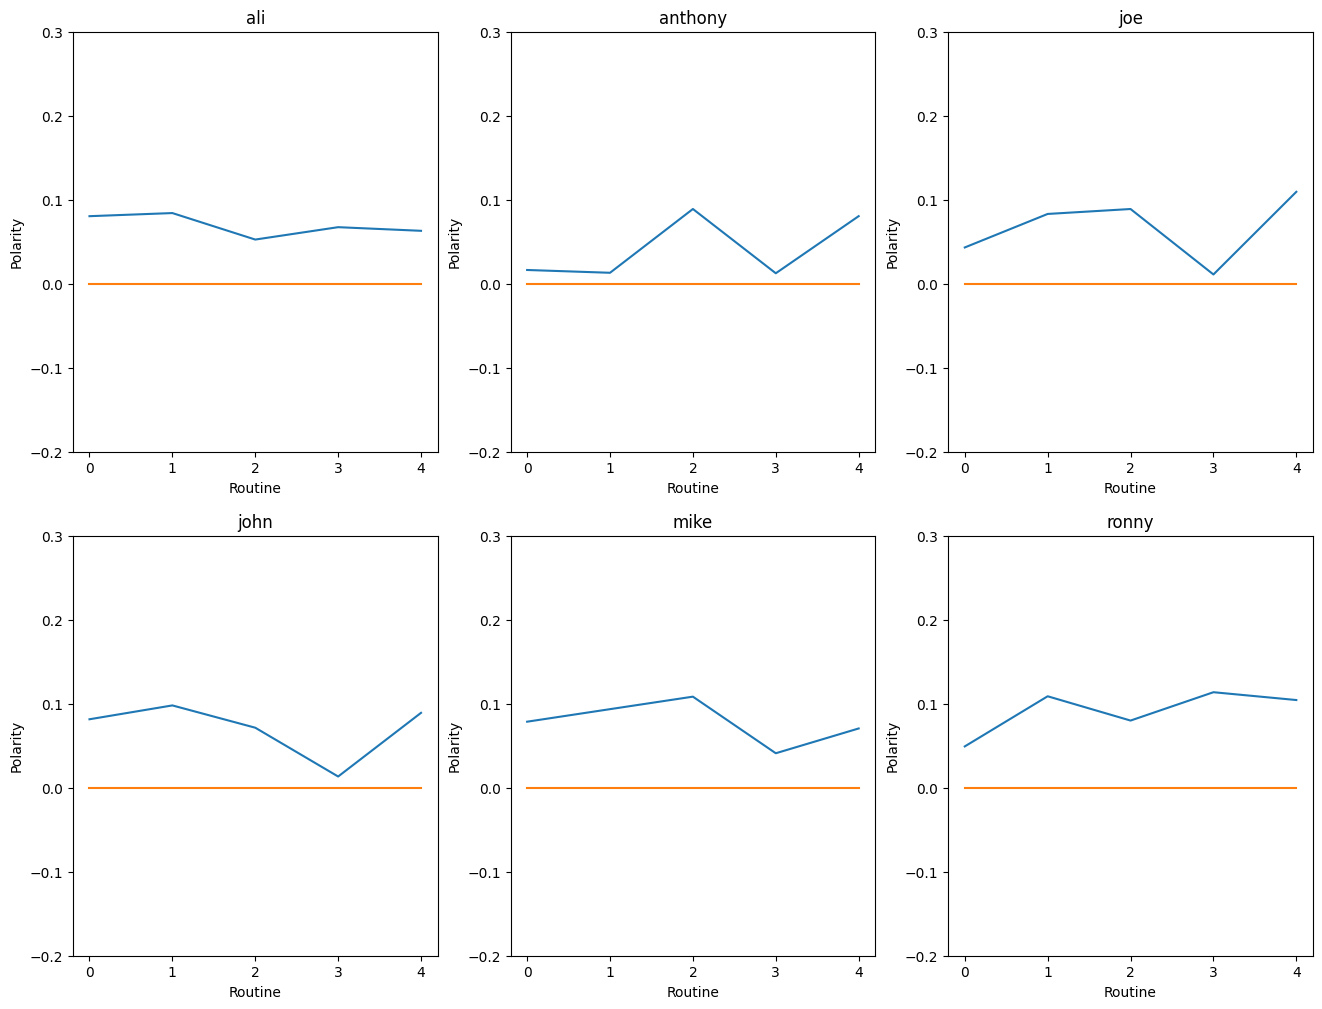

In [56]:
# Show the plot for all comedians
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):
    plt.subplot(2, 3, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,5), np.zeros(5))
    plt.xlabel('Routine')
    plt.ylabel('Polarity')
    plt.title(data.index[index])
    plt.ylim(ymin=-.2, ymax=.3)

plt.show()

# **Findings**

-Anthony exhibits more dramatic sentiment shifts in finer segmentation, suggesting a mix of both highly positive and slightly negative sections within his performance.

-Others, like Joe and John, show relatively stable trends, implying a more consistent emotional tone throughout their sets.

-A larger number of chunks provides a more detailed view of how sentiment changes over time, which can be useful in identifying specific jokes or sections that evoke stronger reactions.

-Fewer chunks provide a more generalized sentiment trend, which may be better suited for understanding overall emotional flow rather than moment-to-moment variations.